In [294]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
import seaborn as sns
from sklearn import linear_model
from sklearn.feature_selection import SelectFromModel


train = pd.read_csv("train.csv", delimiter=',')
test = pd.read_csv("test.csv", delimiter=',')
labels = train.SalePrice


In [295]:
train


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [296]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [297]:
labels


0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
         ...  
1430    192140
1431    143750
1432     64500
1433    186500
1434    160000
1435    174000
1436    120500
1437    394617
1438    149700
1439    197000
1440    191000
1441    149300
1442    310000
1443    121000
1444    179600
1445    129000
1446    157900
1447    240000
1448    112000
1449     92000
1450    136000
1451    287090
1452    145000
1453     84500
1454    185000
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [298]:
# типы данных 
train.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

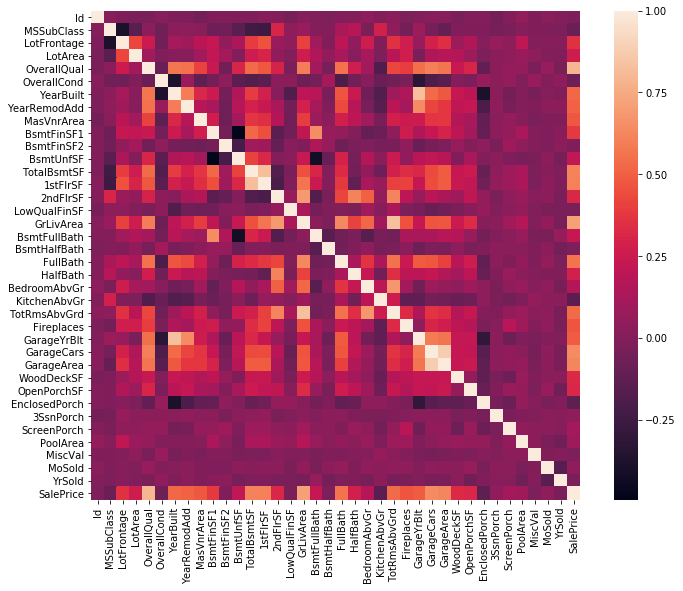

In [299]:
#посмотрим на корреляцию аттрибутов между собой
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True);

In [300]:
# проверим сколько уникальных и пустых значений у атрибутов
print("{0:15}\t{1}\t{2}".format("Name", "NaNs", "#unique"))
for col in train.columns:
    print("{0:15}\t{1:.2f}\t{2}".format(col, train[col].isnull().mean(), train[col].nunique()))

Name           	NaNs	#unique
Id             	0.00	1460
MSSubClass     	0.00	15
MSZoning       	0.00	5
LotFrontage    	0.18	110
LotArea        	0.00	1073
Street         	0.00	2
Alley          	0.94	2
LotShape       	0.00	4
LandContour    	0.00	4
Utilities      	0.00	2
LotConfig      	0.00	5
LandSlope      	0.00	3
Neighborhood   	0.00	25
Condition1     	0.00	9
Condition2     	0.00	8
BldgType       	0.00	5
HouseStyle     	0.00	8
OverallQual    	0.00	10
OverallCond    	0.00	9
YearBuilt      	0.00	112
YearRemodAdd   	0.00	61
RoofStyle      	0.00	6
RoofMatl       	0.00	8
Exterior1st    	0.00	15
Exterior2nd    	0.00	16
MasVnrType     	0.01	4
MasVnrArea     	0.01	327
ExterQual      	0.00	4
ExterCond      	0.00	5
Foundation     	0.00	6
BsmtQual       	0.03	4
BsmtCond       	0.03	4
BsmtExposure   	0.03	4
BsmtFinType1   	0.03	6
BsmtFinSF1     	0.00	637
BsmtFinType2   	0.03	6
BsmtFinSF2     	0.00	144
BsmtUnfSF      	0.00	780
TotalBsmtSF    	0.00	721
Heating        	0.00	6
HeatingQC      	0.00	5
Ce

In [301]:
train = pd.get_dummies(train) #преобразуем категориальные переменные в dummy

In [302]:
# Посмотрим корреляцию атрибутов с таргетом
correlations_data = train.corr()['SalePrice'].sort_values()
correlations_data

ExterQual_TA            -0.589044
KitchenQual_TA          -0.519298
BsmtQual_TA             -0.452394
GarageFinish_Unf        -0.410608
MasVnrType_None         -0.374468
GarageType_Detchd       -0.354141
Foundation_CBlock       -0.343263
HeatingQC_TA            -0.312677
MSZoning_RM             -0.288065
LotShape_Reg            -0.267672
BsmtExposure_No         -0.263600
CentralAir_N            -0.251328
SaleType_WD             -0.242598
RoofStyle_Gable         -0.224744
PavedDrive_N            -0.212630
Foundation_BrkTil       -0.204117
Electrical_FuseA        -0.193978
Neighborhood_OldTown    -0.192189
Neighborhood_NAmes      -0.188513
Neighborhood_Edwards    -0.179949
Exterior1st_MetalSd     -0.167068
Neighborhood_IDOTRR     -0.164056
HouseStyle_1.5Fin       -0.163466
Exterior2nd_MetalSd     -0.162389
Exterior2nd_Wd Sdng     -0.161800
Exterior1st_Wd Sdng     -0.158619
KitchenQual_Fa          -0.157199
SaleCondition_Normal    -0.153990
Neighborhood_BrkSide    -0.143648
Fence_MnPrv   

In [303]:
#удаляем столбцы, которые содержат null
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
train.isnull().sum().max()

train = train.drop((missing_data[missing_data['Total'] > 1]).index,1)
train.isnull().sum().max() #just checking that there's no missing data missing...



0

C:\Users\home\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


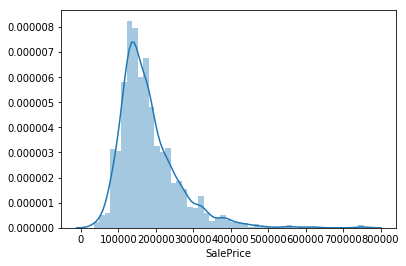

In [304]:
# распределение таргета
sns.distplot(train['SalePrice']);

In [306]:
Y_train = train['SalePrice'] # таргет
X_train = train.drop(["Id","SalePrice"], axis=1) # удаляем  столбцы из набора атрибутов

# Выберем 30 самых значимых атрибутов
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
selector = SelectKBest(chi2, k=30)
selector.fit_transform(X_train, Y_train)
print("selected index:",selector.get_support(indices=True))


selected index: [  0   1   6   7   8   9  10  11  12  13  23  24  25  26  27  28  29  30
  98 100 136 153 164 171 185 203 232 272 276 281]


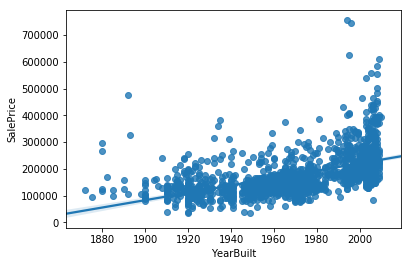

In [324]:
#построим распределения некоторых значимых атрибутов
import seaborn as sns
sns.regplot(train["YearBuilt"], labels)


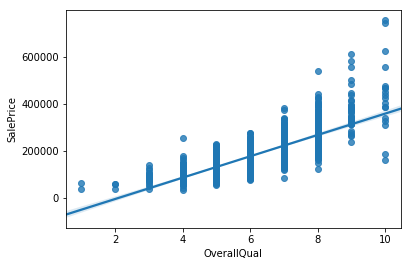

In [325]:
sns.regplot(train["OverallQual"], labels)

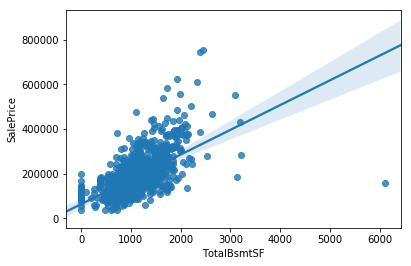

In [326]:
sns.regplot(train["TotalBsmtSF"], labels)

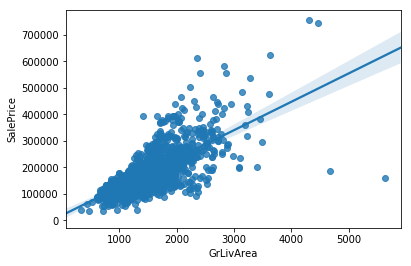

In [327]:
sns.regplot(train["GrLivArea"], labels)

In [328]:
# по результатам корреляции с таргетом, взаимной корреляции атрибутов и отбора значимых переменных с помощью SelectKBest выберем атрибуты, на которых будем строить регрессию
attr = ["SaleCondition_Partial","SaleType_New", "HouseStyle_1Story", "HouseStyle_2Story",  "MoSold", "YrSold", "GarageFinish_Fin", "SaleCondition_Normal", "GarageFinish_Unf", "KitchenQual_Gd", "Fence_MnPrv",  "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "EnclosedPorch", "OpenPorchSF", "BedroomAbvGr", "LotArea", "Neighborhood_NridgHt", "OverallCond", "MSSubClass","HeatingQC_Ex","ExterQual_Ex", "ExterQual_Gd","Fireplaces","Foundation_PConc","KitchenQual_Ex","YearRemodAdd","YearBuilt","TotRmsAbvGrd","FullBath","1stFlrSF", "2ndFlrSF", "TotalBsmtSF","GarageArea","GarageCars","GrLivArea","OverallQual"]



In [329]:
# строим регрессию
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, random_state=0)


from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
regr = LinearRegression()
regr.fit(X_train[attr], Y_train)
print(cross_val_score(regr, X_train[attr], np.log1p(labels), scoring="mean_squared_error", cv=cv).mean())

-0.02410587530017875


C:\Users\home\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\home\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\home\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\home\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\home\Anaconda3\lib\site-pac

In [331]:
test = pd.read_csv("test.csv")
test_Id = test['Id']
test = pd.get_dummies(test) #преобразуем категориальные переменные в dummy

# меняем null
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

test = test.drop((missing_data[missing_data['Total'] > 1]).index,1)
test.isnull().sum().max()

test['BsmtFinSF1'] = test['BsmtFinSF1'].fillna(0)
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(0)
test['BsmtUnfSF'] = test['BsmtUnfSF'].fillna(0)
test['BsmtFinSF2'] = test['BsmtFinSF2'].fillna(0)
test['GarageCars'] = test['GarageCars'].fillna(0)
test['GarageArea'] = test['GarageArea'].fillna(0)

test.isnull().sum().max()



0

In [332]:
# загружаем скоры и Id для теста, рассчитанного регрессией в файл csv
score_regr  = regr.predict(test[attr]).ravel() 

submit = pd.DataFrame()
submit['Id'] = test['Id']
submit['SalePrice'] = score_regr
submit.to_csv('submission.csv',index=False)

In [334]:
# попробуем randomforest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=25, n_estimators=40)
rf.fit(X_train[attr], Y_train.values.ravel())
print(cross_val_score(rf, X_train[attr], np.log1p(labels), scoring="mean_squared_error", cv=cv).mean())

C:\Users\home\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\home\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\home\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\home\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


-0.021855498932280067


C:\Users\home\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


In [335]:
# загружаем скоры и Id для теста, рассчитанного с помощью randomfrest в файл csv
score_rf  = rf.predict(test[attr]).ravel() 

submit = pd.DataFrame()
submit['Id'] = test['Id']
submit['SalePrice'] = score_rf
submit.to_csv('submission.csv',index=False)

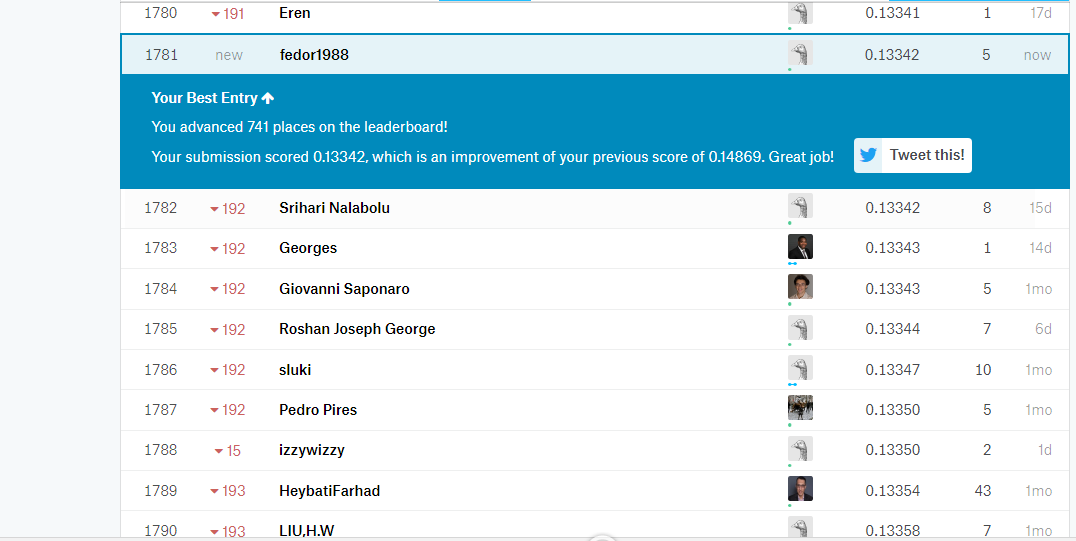

In [336]:
# результат лучше получился у randomforest. Итоговое место - 1781
from IPython.display import Image
Image("C:\Documents\kaggle_res.png")